In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("Crop_recommendation.csv")

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.shape

(2200, 8)

In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Checking null values for data cleaning


In [7]:
df.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

 **Checking duplicates for data cleaning**

In [9]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool


**Checking datatypes of the features which are used in dataset**

In [10]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

**Checking correlation between the features**

In [11]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


**Negative values are darker and positive vaules are lighter** 

<AxesSubplot:>

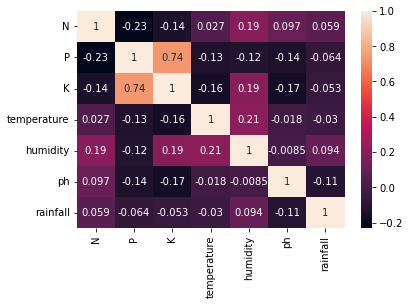

In [12]:
sns.heatmap(df.corr(),annot=True)

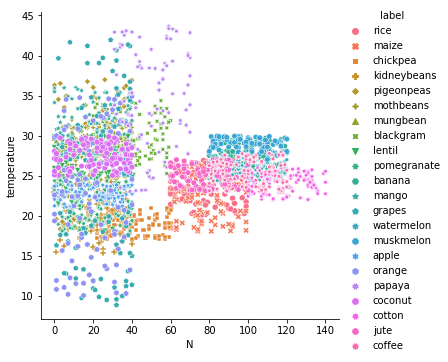

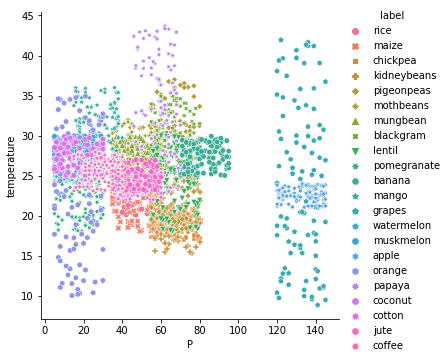

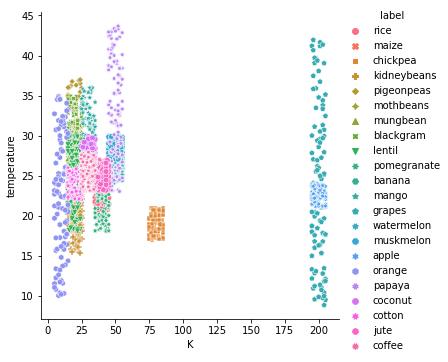

In [13]:
sns.relplot(x='N',y='temperature',data=df, hue='label',style='label')
sns.relplot(x='P',y='temperature',data=df, hue='label',style='label')
sns.relplot(x='K',y='temperature',data=df, hue='label',style='label')

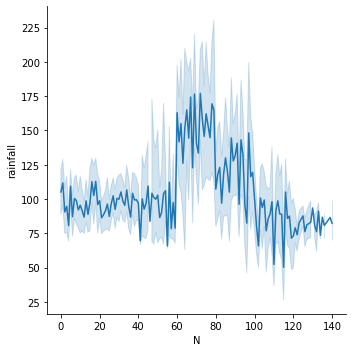

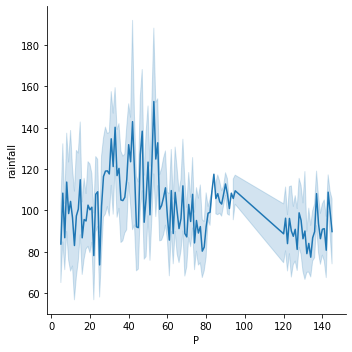

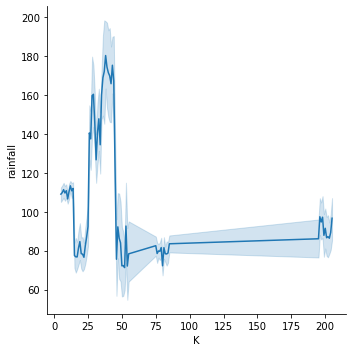

In [14]:
sns.relplot(x='N',y='rainfall',data=df, kind='line')
sns.relplot(x='P',y='rainfall',data=df, kind='line')
sns.relplot(x='K',y='rainfall',data=df, kind='line')

# Data Pre-processing

In [15]:
df['label'] = df.label.astype('category').cat.codes
print(df.dtypes)

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label             int8
dtype: object


# Feature Scaling with Standard Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train=df.drop(['label'], axis=1)
test=df['label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(train,test,test_size=0.2, random_state=5)

In [18]:
X_train.head()

,N,P,K,temperature,humidity,ph,rainfall
621,31,53,16,28.742010,85.816759,6.452006,48.545986
2098,90,39,43,24.447439,82.286484,6.769346,190.968489
1229,23,142,197,39.065555,82.038130,6.000574,69.307729
1418,82,18,48,29.095883,94.167484,6.159051,26.705813
1880,35,30,34,28.297476,95.411228,6.141502,182.448235


In [19]:
from sklearn.preprocessing import StandardScaler
#fit the scaler to the train set for learning the parameters
scaler = StandardScaler().fit(X_train)

#Transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

model_scaled= LinearRegression().fit(X_train_scaled, y_train)

In [21]:
print('model coefficients are', model_scaled.coef_)
print('model intercept is', model_scaled.intercept_)
print('model score is', model_scaled.score(X_train_scaled,y_train))

model coefficients are [-1.21491959 -2.9647923  -0.39397445  0.10764886  1.15649143 -0.37921547
  0.12528114]
model intercept is 10.444886363636364
model score is 0.3009972942021262


In [22]:
y_pred_scaled= model_scaled.predict(X_test_scaled)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('mean squared error is', np.round(mean_squared_error(y_pred_scaled, y_test)))
print('r squared is', r2_score(y_pred_scaled, y_test))
print('mean absolute error is', mean_absolute_error(y_pred_scaled,y_test))

mean squared error is 30.0
r squared is -1.4868725622275707
mean absolute error is 4.31130664562092


# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lgr= LogisticRegression(max_iter=1000)

lgr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [25]:
prediction_test = lgr.predict(X_test_scaled)

In [26]:
print("Accuracy=", metrics.accuracy_score(y_test,prediction_test))

Accuracy= 0.9659090909090909


In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
cm = confusion_matrix(y_test,prediction_test,labels=(0,1))
print('confusion_matrix',cm)

confusion_matrix [[24  0]
 [ 0 15]]


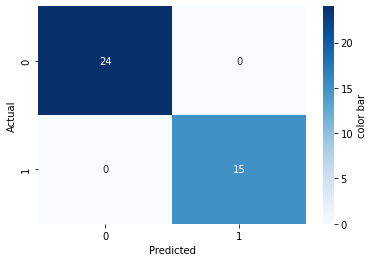

In [29]:
sns.heatmap(cm,cmap="Blues",annot=True,cbar_kws={"label":"color bar"})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        15
           2       0.95      0.91      0.93        22
           3       1.00      1.00      1.00        19
           4       0.95      1.00      0.98        20
           5       1.00      1.00      1.00        25
           6       0.92      0.92      0.92        13
           7       1.00      1.00      1.00        17
           8       0.93      0.93      0.93        15
           9       0.83      0.94      0.88        16
          10       0.89      0.94      0.92        18
          11       0.96      0.96      0.96        27
          12       1.00      1.00      1.00        18
          13       0.95      0.95      0.95        22
          14       1.00      1.00      1.00        19
          15       0.96      1.00      0.98        24
          16       1.00      0.96      0.98        23
          17       1.00    

# Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()

In [33]:
gnb.fit(X_train_scaled,y_train)

GaussianNB()

In [34]:
y_pred2=gnb.predict(X_test_scaled)

In [35]:
from sklearn import metrics
print("Accuracy=",metrics.accuracy_score(y_test,y_pred2))

Accuracy= 0.9977272727272727


In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cm2 = confusion_matrix(y_test,y_pred2,labels=[0,1])
print('confusion_matrix',cm2)

confusion_matrix [[24  0]
 [ 0 15]]


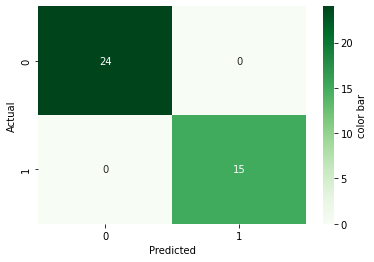

In [38]:
sns.heatmap(cm2,cmap="Greens",annot=True,cbar_kws={"label":"color bar"})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        17
           8       0.94      1.00      0.97        15
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        27
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        22
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        23
          17       1.00    

# MLP Neural Network

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

nn= MLPClassifier(activation="logistic",max_iter=1000)
nn.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', max_iter=1000)

In [48]:
prediction3 = nn.predict(X_test_scaled)

score = accuracy_score(y_test, prediction3)

print("Accuracy=",score)

Accuracy= 0.9931818181818182


In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
cm3 = confusion_matrix(y_test,prediction3,labels=[0,1])
print('confusion_matrix',cm3)

confusion_matrix [[24  0]
 [ 0 15]]


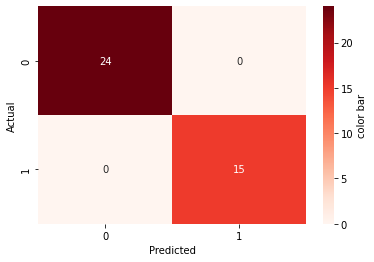

In [45]:
sns.heatmap(cm3,cmap="Reds",annot=True,cbar_kws={"label":"color bar"})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test,prediction3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        17
           8       0.88      0.93      0.90        15
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        27
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        22
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        23
          17       1.00    